In [1]:
import glob
import os
import subprocess
import datetime as dt
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mintpy import view, plot_network
from mintpy.objects import gnss, timeseries
from mintpy.smallbaselineApp import TimeSeriesAnalysis
from mintpy.utils import ptime, readfile, utils as ut
from scipy import signal

from urllib.request import urlretrieve

In [5]:
insar_ts_file =r'C:\Users\bvarugu\Documents\Lamont_Earthquake\ARIA_products\timeseries_vert.h5';
insar_ts, insar_metadata  = readfile.read(insar_ts_file, datasetName='timeseries');
date_list = timeseries(insar_ts_file).get_date_list()
num_date = len(date_list)
date0, date1 = date_list[0], date_list[-1]
insar_dates = ptime.date_list2vector(date_list)[0]

coord = ut.coordinate(insar_metadata)


InSAR_coh_filename = r'C:\Users\bvarugu\Documents\Lamont_Earthquake\ARIA_products\Asc\avgSpatialCoh.h5';
avgSpatialCoh = readfile.read(InSAR_coh_filename)[0]

Lamont_Eq_date = dt.datetime(2024, 8, 7, 0, 0)

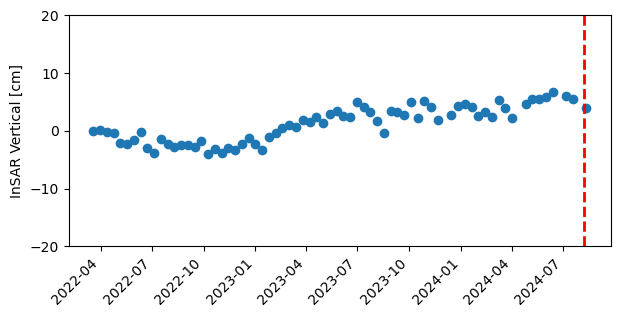

In [61]:
#point_of_interest= [35.10874,-119.09704,'Lamont Earthquake'];
#point_of_interest= [35.07615,-119.15884,'Center of uplift'];
point_of_interest= [35.07207,-119.15370,'Bride1'];
#point_of_interest= [35.05874,-119.09287,'Bride2'];
point_lat,point_lon,point_name = point_of_interest[0],point_of_interest[1],point_of_interest[2];

y, x = coord.geo2radar(point_lat,point_lon)[:2]
insar_dis = insar_ts[:,y,x];



fig, ax = plt.subplots(figsize=(7, 3))
ax.scatter(insar_dates, insar_dis*100, label="InSAR Positions")


# axis format
#ax.set_title(f"Station Name: {point_name}") 
ax.set_ylabel('InSAR Vertical [cm]');
ax.set_ylim([-20,20]);
ax.set_yticks([-20,-10,0,10,20]);
#Add vertical line of earthquake
ax.axvline(Lamont_Eq_date,color='red',linestyle='dashed', linewidth=2)
# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")  
plt.savefig(f'ARIA_up_Timseseries_{point_name}.png',dpi=300,bbox_inches='tight',transparent=True)
#plt.show()

In [63]:
def get_insar_ts_info(insar_ts_file):
    insar_ts, insar_metadata  = readfile.read(insar_ts_file, datasetName='timeseries');
    date_list = timeseries(insar_ts_file).get_date_list()
    num_date = len(date_list)
    date0, date1 = date_list[0], date_list[-1]
    insar_dates = ptime.date_list2vector(date_list)[0]
    
    coord = ut.coordinate(insar_metadata)
    return insar_ts,insar_dates,coord
insar_asc_ts_file =r'C:\Users\bvarugu\Documents\Lamont_Earthquake\ARIA_products\Asc\timeseries_tropHgt_demErr_refMRRY.h5';
insar_asc_ts,insar_asc_dates,insar_asc_coord = get_insar_ts_info(insar_asc_ts_file);


In [65]:
insar_dsc_ts_file =r'C:\Users\bvarugu\Documents\Lamont_Earthquake\ARIA_products\Dsc\timeseries_tropHgt_demErr_refMRRY.h5';
insar_dsc_ts,insar_dsc_dates,insar_dsc_coord = get_insar_ts_info(insar_dsc_ts_file);

insar_vert_ts_file =r'C:\Users\bvarugu\Documents\Lamont_Earthquake\ARIA_products\timeseries_vert.h5';
insar_vert_ts,insar_vert_dates,insar_vert_coord = get_insar_ts_info(insar_vert_ts_file);


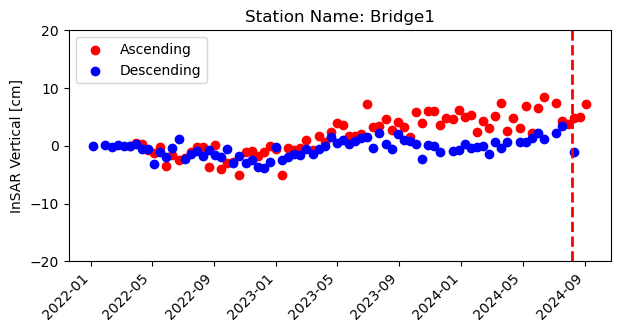

In [85]:
#point_of_interest= [35.10874,-119.09704,'Lamont Earthquake'];
#point_of_interest= [35.07615,-119.15884,'Center of uplift'];
point_of_interest= [35.07207,-119.15370,'Bridge1'];
#point_of_interest= [35.05874,-119.09287,'Bridge2'];
point_lat,point_lon,point_name = point_of_interest[0],point_of_interest[1],point_of_interest[2];



y, x = insar_asc_coord.geo2radar(point_lat,point_lon)[:2]
insar_asc_dis = insar_asc_ts[:,y,x];
y, x = insar_dsc_coord.geo2radar(point_lat,point_lon)[:2]
insar_dsc_dis = insar_dsc_ts[:,y,x];
y, x = insar_vert_coord.geo2radar(point_lat,point_lon)[:2]
insar_vert_dis = insar_vert_ts[:,y,x];


fig, ax = plt.subplots(figsize=(7, 3))
ax.scatter(insar_asc_dates, insar_asc_dis*100, label="Ascending",color='red')
ax.scatter(insar_dsc_dates, insar_dsc_dis*100, label="Descending",color='blue')
#ax.scatter(insar_vert_dates, insar_vert_dis*100, label="Vertical",color='black')

# axis format
ax.set_title(f"Station Name: {point_name}") 
ax.set_ylabel('InSAR Vertical [cm]');
ax.set_ylim([-20,20]);
ax.set_yticks([-20,-10,0,10,20]);
#Add vertical line of earthquake
ax.axvline(Lamont_Eq_date,color='red',linestyle='dashed', linewidth=2)
# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
ax.legend()
plt.savefig(f'ARIA_asc_dsc_up_Timseseries_{point_name}.png',dpi=300,bbox_inches='tight',transparent=True)
#plt.show()